<a href="https://colab.research.google.com/github/KunpengXu/Time-series-Forecasting/blob/main/xkp_time_series_forcasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [226]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [227]:
train_original=train.copy()
test_original=test.copy()

In [228]:
train.columns, test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [229]:
train.dtypes
test.dtypes

ID           int64
Datetime    object
dtype: object

In [230]:
train.shape

(18288, 3)

In [231]:
test.shape

(5112, 2)

In [232]:
train['Datetime']=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')

In [233]:
test['Datetime']=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')

In [234]:
train_original['Datetime']=pd.to_datetime(train_original.Datetime, format='%d-%m-%Y %H:%M')

In [235]:
test_original['Datetime']=pd.to_datetime(test_original.Datetime, format='%d-%m-%Y %H:%M')

In [236]:
for i in (train, test, train_original, test_original):
  i['year']=i.Datetime.dt.year
  i['month']=i.Datetime.dt.month
  i['day']=i.Datetime.dt.day
  i['Hour']=i.Datetime.dt.hour

In [237]:
i

,ID,Datetime,year,month,day,Hour
0,18288,2014-09-26 00:00:00,2014,9,26,0
1,18289,2014-09-26 01:00:00,2014,9,26,1
2,18290,2014-09-26 02:00:00,2014,9,26,2
3,18291,2014-09-26 03:00:00,2014,9,26,3
4,18292,2014-09-26 04:00:00,2014,9,26,4
...,...,...,...,...,...,...
5107,23395,2015-04-26 19:00:00,2015,4,26,19
5108,23396,2015-04-26 20:00:00,2015,4,26,20
5109,23397,2015-04-26 21:00:00,2015,4,26,21
5110,23398,2015-04-26 22:00:00,2015,4,26,22


In [238]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [239]:
def applyer(row):
  if row.dayofweek ==5 or row.dayofweek ==6:
    return 1
  else:
    return 0
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2

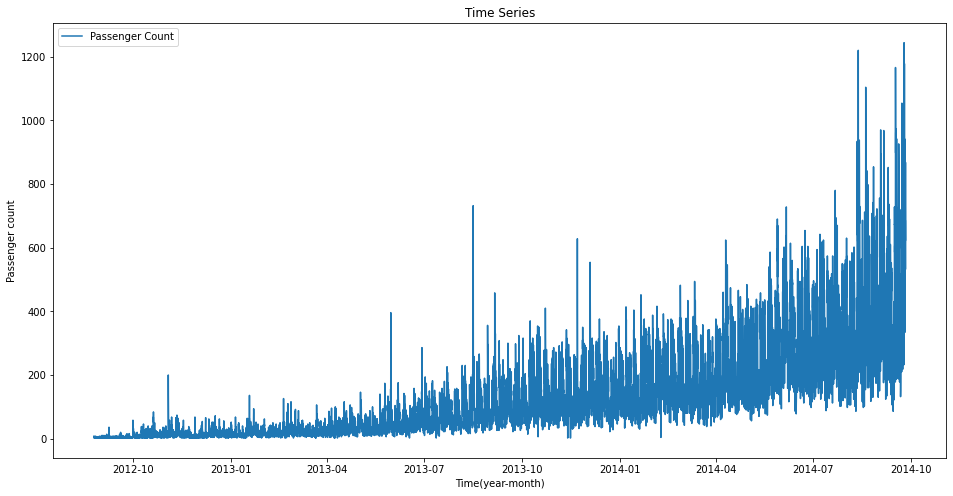

In [240]:
train.index=train['Datetime']
df=train.drop('ID',1)
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel("Time(year-month)")
plt.ylabel("Passenger count")
plt.legend(loc='best')

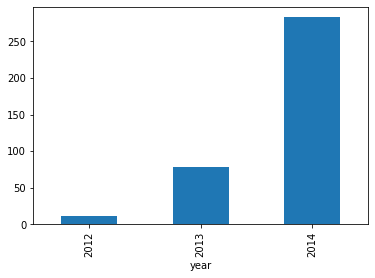

In [241]:
train.groupby('year')['Count'].mean().plot.bar()

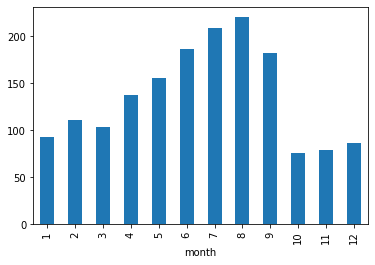

In [242]:
train.groupby('month')['Count'].mean().plot.bar()

In [243]:
temp=train.groupby(['year','month'])['Count'].mean()

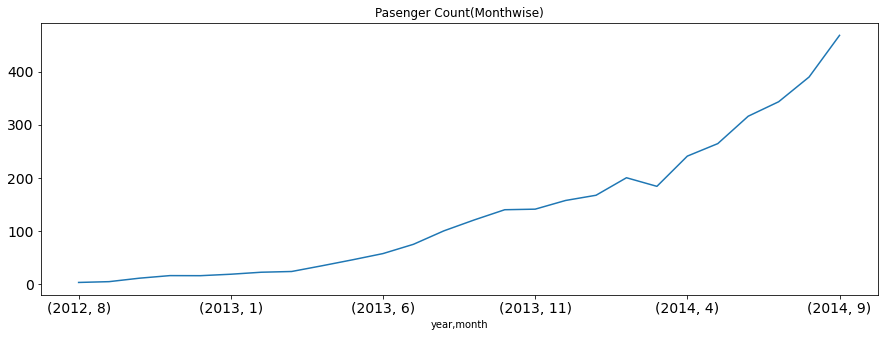

In [244]:
temp.plot(figsize=(15,5), title='Pasenger Count(Monthwise)',fontsize=14)

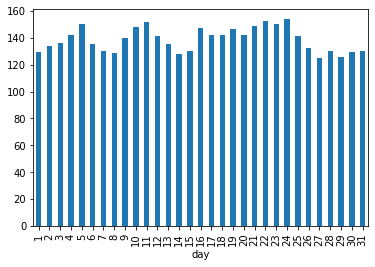

In [245]:
train.groupby('day')['Count'].mean().plot.bar()

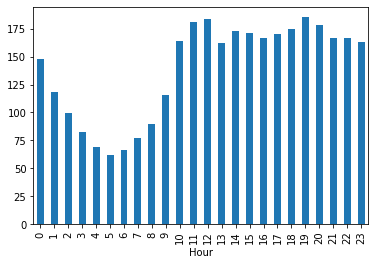

In [246]:
train.groupby('Hour')['Count'].mean().plot.bar()

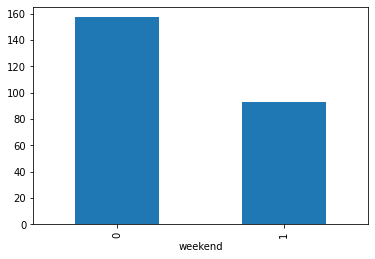

In [247]:
train.groupby('weekend')['Count'].mean().plot.bar()

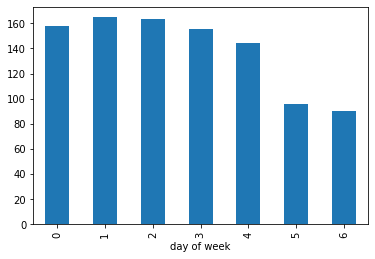

In [248]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [249]:
train=train.drop('ID',1)

In [250]:
train.Timestamp=pd.to_datetime(train.Datetime, format='%d-%m-%Y %H:%M')


In [251]:
train.index =train.Timestamp =train.Timestamp

In [252]:
hourly =train.resample('H').mean()

In [253]:
daily =train.resample('D').mean()

In [254]:
weekly =train.resample('W').mean()

In [255]:
monthly =train.resample('M').mean()

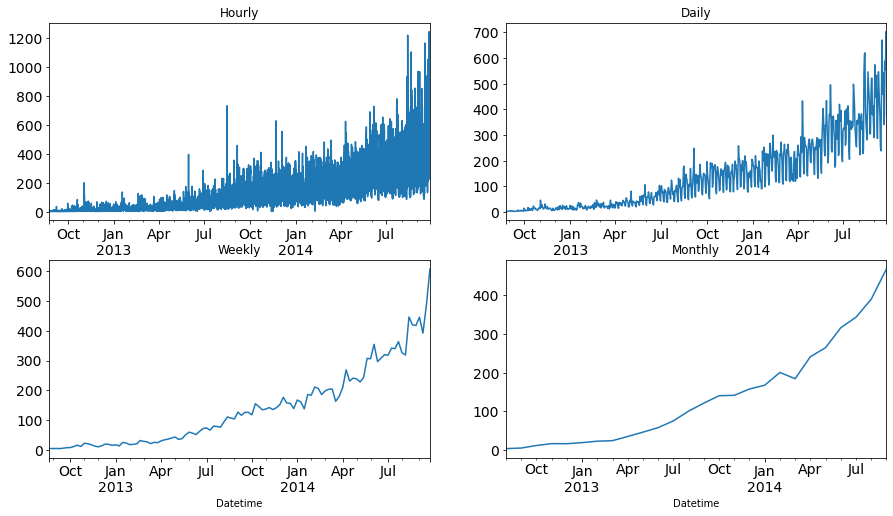

In [256]:
fig, axs=plt.subplots(2,2)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axs[0,0])
daily.Count.plot(figsize=(15,8),title='Daily', fontsize=14, ax=axs[0,1])
weekly.Count.plot(figsize=(15,8),title='Weekly', fontsize=14, ax=axs[1,0])
monthly.Count.plot(figsize=(15,8),title='Monthly', fontsize=14, ax=axs[1,1])
plt.show()

In [257]:
test.Timestamp=pd.to_datetime(test.Datetime, format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

In [258]:
test=test.resample('D').mean()

In [259]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp

In [260]:
train=train.resample('D').mean()

In [261]:
Train=train.loc['2012-08-25':'2014-06-24']

In [262]:
valid=train.loc['2014-06-25':'2014-09-25']

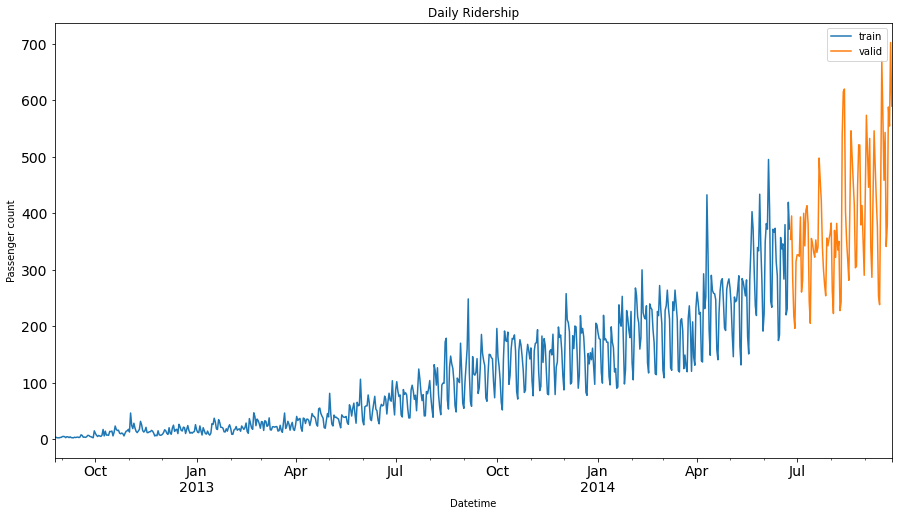

In [263]:
Train.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='train')
valid.Count.plot(figsize=(15,8), title='Daily Ridership', fontsize=14, label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()

In [264]:
#Naive Approach
dd=np.asarray(Train.Count)


In [265]:
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]

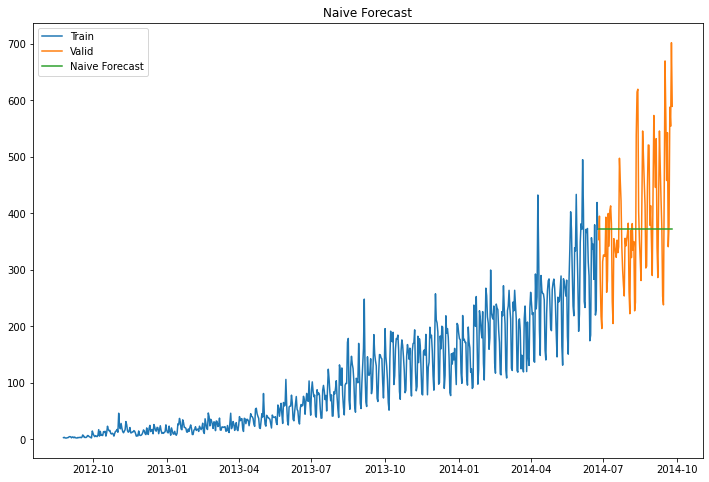

In [266]:
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index, y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()


In [267]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rmse)

111.79050467496724


In [268]:
#Moving Average
y_hat_avg1=valid.copy()
y_hat_avg1['moving_avg_forecast']=Train['Count'].rolling(10).mean().iloc[-1]

In [269]:
y_hat_avg2=valid.copy()
y_hat_avg2['moving_avg_forecast']=Train['Count'].rolling(20).mean().iloc[-1]

In [270]:
y_hat_avg3=valid.copy()
y_hat_avg3['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1]

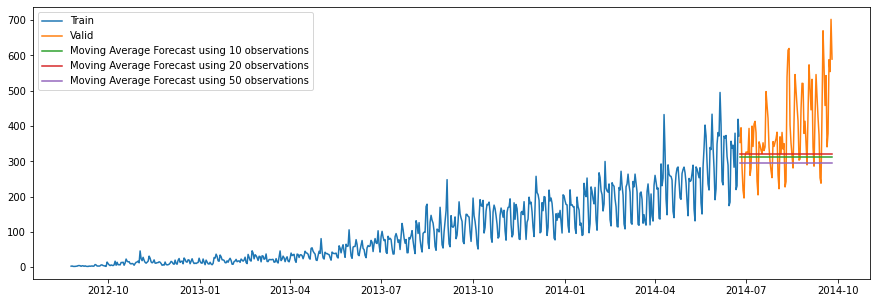

In [271]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg1['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.plot(y_hat_avg2['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.plot(y_hat_avg3['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [272]:
rmse1=sqrt(mean_squared_error(valid.Count,y_hat_avg1.moving_avg_forecast))
rmse2=sqrt(mean_squared_error(valid.Count,y_hat_avg2.moving_avg_forecast))
rmse3=sqrt(mean_squared_error(valid.Count,y_hat_avg3.moving_avg_forecast))
print(rmse1,rmse2,rmse3)

134.23733308950264 130.44984977550422 144.19175679986802


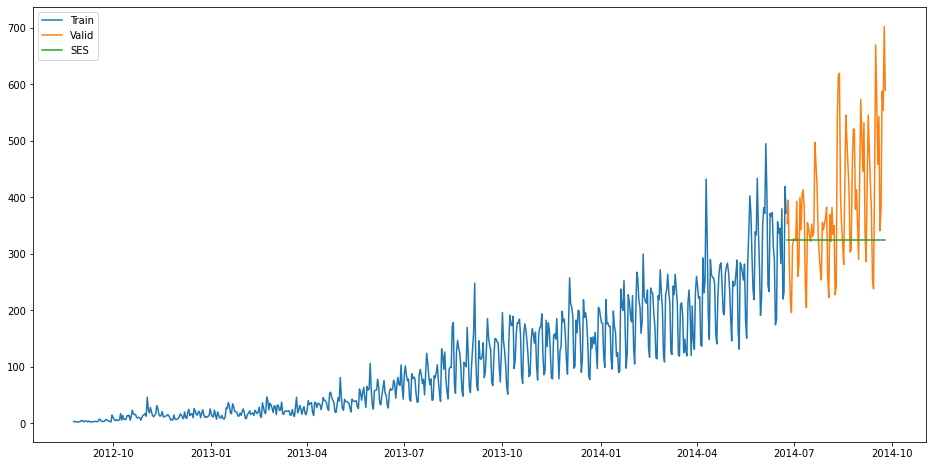

In [273]:
#Simple Exponential Smoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
#y_hat_avg4=train.copy()
y_hat_avg4=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.2, optimized=False)
#y_hat_avg4['SES']=np.append(fit2.fittedvalues,fit2.forecast(len(valid)))
y_hat_avg4['SES']=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg4['SES'],label='SES')
plt.legend(loc='best')
plt.show()




In [274]:
rmse4=sqrt(mean_squared_error(valid.Count,y_hat_avg4.SES))
print(rmse4)

128.05565831088646


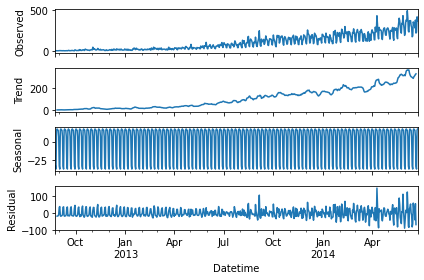

In [275]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
result=sm.tsa.stattools.adfuller(train.Count)
plt.show()

In [276]:
result

(2.9863509590138064,
 1.0,
 20,
 741,
 {'1%': -3.4392057325732104,
  '10%': -2.5688512291811225,
  '5%': -2.8654483492874236},
 7212.068059584323)

In [277]:
#Holt's Linear Trend Model
y_hat_avg5=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.3,smoothing_slope=0.1)

In [278]:
y_hat_avg5['Holt_linear']=fit1.forecast(len(valid))

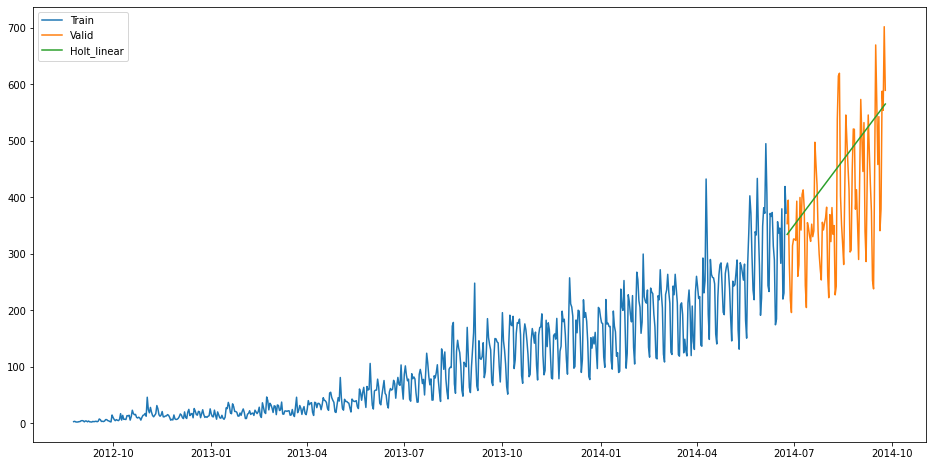

In [279]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg5['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [280]:
rmse5=sqrt(mean_squared_error(valid.Count,y_hat_avg5.Holt_linear))
print(rmse5)

112.94278345314041


In [281]:
submission=pd.read_csv('sample_submission_LSeus50.csv') 

In [282]:
predict=fit1.forecast(len(test))

In [283]:
test['prediction']=predict

In [284]:
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

In [285]:
temp=train_original.groupby(['Hour'])['ratio'].sum()

In [286]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv')

In [287]:
temp2=pd.read_csv("GROUPby.csv")

In [288]:
temp2=temp2.drop('Hour.1',1)

In [289]:
temp2

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802
5,5,0.018621
6,6,0.020023
7,7,0.023221
8,8,0.026741
9,9,0.034555


In [290]:
merge=pd.merge(test,test_original,on=('day','month','year'), how='left')

In [291]:
merge

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4
...,...,...,...,...,...,...,...,...,...
5107,23387.5,2015.0,4.0,26.0,11.5,866.398583,23395,2015-04-26 19:00:00,19
5108,23387.5,2015.0,4.0,26.0,11.5,866.398583,23396,2015-04-26 20:00:00,20
5109,23387.5,2015.0,4.0,26.0,11.5,866.398583,23397,2015-04-26 21:00:00,21
5110,23387.5,2015.0,4.0,26.0,11.5,866.398583,23398,2015-04-26 22:00:00,22


In [292]:
merge['Hour']=merge['Hour_y']

In [293]:
merge=merge.drop(['year','month','Datetime','Hour_x','Hour_y'],axis=1)

In [294]:
prediction=pd.merge(merge,temp2,on='Hour',how="left")

In [295]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802
...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627
5108,23387.5,26.0,866.398583,23396,20,0.053455
5109,23387.5,26.0,866.398583,23397,21,0.049895
5110,23387.5,26.0,866.398583,23398,22,0.050076


In [296]:
#pd.DataFrame(prediction).to_csv('prediction.csv')

In [297]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24
prediction['ID']=prediction['ID_y']

In [298]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio,Count,ID
0,18299.5,26.0,334.650767,18288,0,0.044287,355.692974,18288
1,18299.5,26.0,334.650767,18289,1,0.035343,283.861602,18289
2,18299.5,26.0,334.650767,18290,2,0.029911,240.234347,18290
3,18299.5,26.0,334.650767,18291,3,0.024714,198.497058,18291
4,18299.5,26.0,334.650767,18292,4,0.020802,167.075574,18292
...,...,...,...,...,...,...,...,...
5107,23387.5,26.0,866.398583,23395,19,0.055627,1156.675482,23395
5108,23387.5,26.0,866.398583,23396,20,0.053455,1111.525192,23396
5109,23387.5,26.0,866.398583,23397,21,0.049895,1037.491153,23397
5110,23387.5,26.0,866.398583,23398,22,0.050076,1041.255041,23398


In [299]:
submission=prediction.drop(['ID_x','day','ID_y','prediction','Hour','ratio'],axis=1)

In [300]:
submission.index=submission['ID']

In [301]:
submission.drop(['ID'],axis=1)

,Count
ID,
18288,355.692974
18289,283.861602
18290,240.234347
18291,198.497058
18292,167.075574
...,...
23395,1156.675482
23396,1111.525192
23397,1037.491153


In [302]:
pd.DataFrame(submission,columns=['Count']).to_csv('Holt linear.csv')
#Holt linear model:Your score for this submission is : 290.4891096619147.

In [303]:
#Holt Winter
y_hat_avg6=valid.copy()

In [304]:
fit1 = ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7, trend='add', seasonal='add',).fit()

In [305]:
y_hat_avg6['Holt_Winter']=fit1.forecast(len(valid))

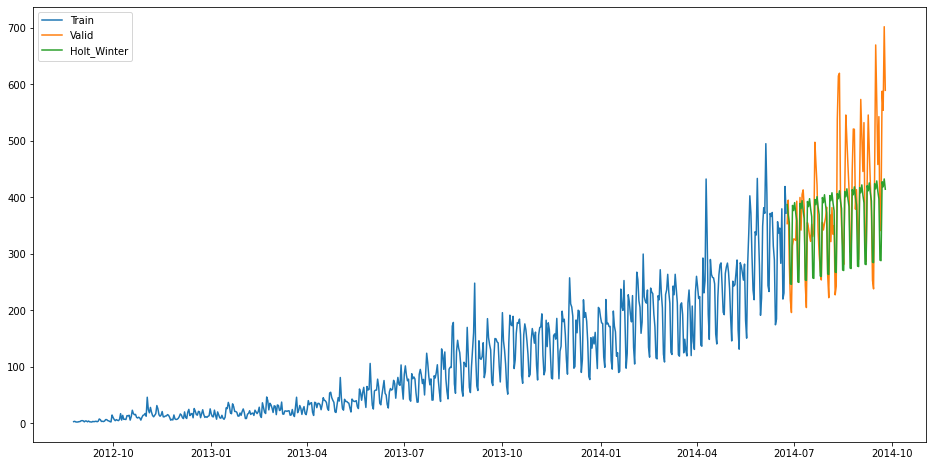

In [306]:
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg6['Holt_Winter'],label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [307]:
rmse6=sqrt(mean_squared_error(valid.Count,y_hat_avg6.Holt_Winter))
print(rmse6)

82.37571191747172


In [308]:
predict=fit1.forecast(len(test))

In [309]:
test['prediction']=predict

In [310]:
merge=pd.merge(test,test_original, on=('day','month','year'),how='left')
merge['Hour']=merge['Hour_y']
merge=merge.drop(['year','month','Datetime','Hour_x','Hour_y'], axis=1)

In [311]:
prediction=pd.merge(merge,temp2,on='Hour',how='left')

In [316]:
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [313]:
#prediction['ratio'][:].sum()

In [317]:
prediction

,ID_x,day,prediction,ID_y,Hour,ratio,Count
0,18299.5,26.0,387.359995,18288,0,0.044287,411.716459
1,18299.5,26.0,387.359995,18289,1,0.035343,328.571274
2,18299.5,26.0,387.359995,18290,2,0.029911,278.072500
3,18299.5,26.0,387.359995,18291,3,0.024714,229.761373
4,18299.5,26.0,387.359995,18292,4,0.020802,193.390842
...,...,...,...,...,...,...,...
5107,23387.5,26.0,460.383780,23395,19,0.055627,614.630080
5108,23387.5,26.0,460.383780,23396,20,0.053455,590.638281
5109,23387.5,26.0,460.383780,23397,21,0.049895,551.298338
5110,23387.5,26.0,460.383780,23398,22,0.050076,553.298379


In [318]:
prediction['ID']=prediction['ID_y']

In [319]:
submission=prediction.drop(['day','Hour','ratio','prediction','ID_x','ID_y'],axis=1)

In [322]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv('Holt winters.csv')
#Holt winters model: Your score for this submission is : 333.10229767773137.

In [356]:
#ARIMA model
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Determing rolling statistics
  rolmean=timeseries.rolling(24).mean()
  rolstd=timeseries.rolling(24).std()
  orig=plt.plot(timeseries,color='blue',label='Original')
  mean=plt.plot(rolmean,color='red',label='Rolling Mean')
  std=plt.plot(rolstd,color='black',label='Rolling std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.savefig('Rolling Mean.pdf', bbox_inches='tight')
  plt.show()
  #Perform Dickey-Fuller test:
  print('Results of Dickey-Fuller Test')
  dftest=adfuller(timeseries, autolag='AIC')
  dfoutput =pd.Series(dftest[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]=value
  print(dfoutput)


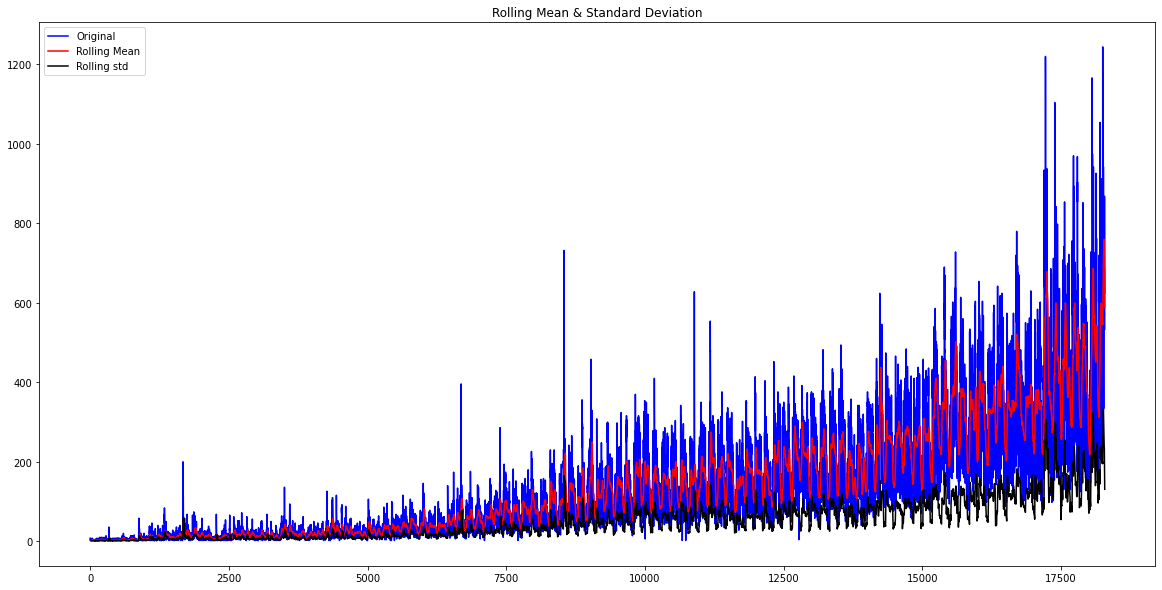

Results of Dickey-Fuller Test
Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


In [357]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

test_stationarity(train_original['Count'])

In [1]:
dftest

NameError: ignored